<h1 style="text-align: center; font-family: 'Times New Roman', serif; font-size: 60px; color: #1E3A5F; text-decoration: underline; margin-bottom: 20px;">
    PROJET DE PYTHON POUR LA DATA SCIENCE
</h1>

<h2 style="text-align: center; font-family: 'Times New Roman', serif; font-size: 40px; color: #2A3D66; font-style: italic; margin-top: 20px; text-decoration: underline;">
    Sujet : Modélisation prédictive de la gravité des accidents routiers en France : effets des facteurs socio-démographiques, techniques et environnementaux
</h2>

<h3 style="text-align: center; font-family: 'Times New Roman', serif; font-size: 40px; color: #4A90E2; text-decoration: underline; margin-top: 40px;">
    Contexte général
</h3>

<p style="font-family: 'Times New Roman', serif; font-size: 18px; line-height: 1.8; color: #333333; text-align: justify; margin: 0 20px;">
    Les accidents de la route représentent un enjeu majeur pour la société, tant sur le plan humain qu’économique. En 2021, leur coût en France a été estimé à 46,3 milliards d’euros, incluant non seulement les dépenses directes telles que les soins médicaux et les réparations, mais aussi les coûts indirects liés à la perte de productivité et aux indemnités versées aux victimes. <br><br>
    Face à cette problématique, il devient essentiel de quantifier et prédire la gravité des accidents afin de mieux orienter les politiques de prévention et de gestion des risques. Dans ce cadre, notre projet propose d'utiliser des modèles de machine learning pour analyser l'impact de variables clés telles que l'âge des conducteurs (facteurs sociaux), le type d'agglomération (urbaine ou non), et les paramètres de sécurité (comme la sécurité 1) sur la sévérité des accidents. <br><br>
    Ces variables permettent de mieux comprendre comment des facteurs socio-démographiques, géographiques et techniques influencent la probabilité et la gravité des accidents. Par exemple, l’âge des conducteurs peut indiquer des comportements à risque spécifiques, tandis que le type d’agglomération peut influencer la fréquence et la nature des accidents, avec des différences notables entre les zones urbaines et rurales. Les paramètres de sécurité, comme la présence de dispositifs de sécurité (ceintures, airbags), jouent également un rôle crucial dans la réduction des blessures graves. <br><br>
    Cette approche permettra une segmentation plus fine des profils d'accidents, offrant ainsi une vision plus précise des risques sur la base des données disponibles. <br><br>
    Les prédictions générées joueront un rôle essentiel dans l'amélioration de la sécurité routière en facilitant un ciblage plus efficace des interventions publiques, en ajustant les stratégies assurantielles et en optimisant la gestion budgétaire de l'État. <br><br>
    À terme, ces actions contribueront à réduire les coûts économiques et sociaux associés aux accidents, tout en mettant en place des solutions plus efficaces pour la sécurité routière.
</p>


## 1. Présentation et traitement des bases de données
Pour la mise en œuvre de ce projet, nous partirons de 4 base de données **caract-2023**, **usagers-2023**, **lieux-2023**, **vehicules-2023** tous disponibles et téléchargeable sur la plateforme [data.gouv](https://www.data.gouv.fr/fr/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2023/) et fournissant des données sur 54822 accidents survenus en France en 2023 pour l'année 2023. Un descriptif détaillé de chacune des variables des bases est disponible dans le fichier **Description des bases de données annuelles_2021** disponible sur ce dépôt. 

**L'idée est d'utiliser ces bases de données après leur téléchargement, puis de les compléter en les fusionnant à partir des clés communes. Cela nous permettra de passer de trois bases de données distinctes à une base de données unique, intégrant tous les facteurs environnementaux, techniques et sociaux. Nous effectuerons également des transformations de certaines variables, comme la conversion de la date de naissance en variable "âge", afin d'optimiser notre analyse. En somme, notre objectif est de créer une base de données nettoyée et prête à être exploitée pour les étapes suivantes du projet.**
### 1.1 Présentation et traitement de la base caract-2023
La base **caract-2023** (accidents recensés entre le 1er janvier et le 31 décembre 2023) est produite et maintenue par l'Observatoire national interministériel de la sécurité routière (ONISR), en collaboration avec les forces de l’ordre (police, gendarmerie) et les services préfectoraux.  

La base **caract-2023** regroupe des informations sur les accidents, telles que :  

- **Num_Acc** : Le numéro d'identifiant unique attribué à chaque accident. Il permet de relier les différentes rubriques du fichier pour une analyse plus cohérente.  
- **jour et mois** : Ces variables indiquent respectivement le jour et le mois où l'accident a eu lieu, facilitant l'analyse temporelle des accidents.  
- **an** : L'année durant laquelle l'accident s'est produit. Cette information est essentielle pour les études longitudinales ou les tendances annuelles.  
- **hrmn** : Heure et minutes précises de l'accident, permettant de comprendre les variations horaires dans les occurrences des accidents.  
- **lum** : Les conditions d’éclairage au moment de l’accident, classifiées en cinq catégories allant de plein jour (1) à nuit avec éclairage public allumé (5).  
- **dep** : Le code INSEE du département où l'accident s'est produit. Ce code est utile pour des analyses géographiques à l’échelle départementale.  
- **com** : Le code INSEE de la commune, composé du code départemental suivi de trois chiffres, pour localiser précisément l’accident.  
- **agg** : La localisation de l'accident par rapport à l’agglomération, avec une distinction entre hors agglomération (1) et en agglomération (2).  
- **int** : La typologie de l’intersection où l'accident a eu lieu, définie par neuf catégories, notamment intersection en T (3) ou giratoire (6).  
- **atm** : Les conditions météorologiques lors de l'accident, allant de normale (1) à des phénomènes comme neige (4) ou vent fort (6).  
- **col** : Le type de collision impliquant les véhicules, tel que frontale entre deux véhicules (1), collision multiple (5) ou sans collision (7).  
- **adr** : L'adresse postale associée aux accidents survenus en agglomération, pour une localisation précise.  
- **lat et long** : Latitude et longitude correspondant à la position géographique exacte de l'accident.  

Au total, elle regroupe donc 15 variables relatives aux 54822 enregistrés.


In [1]:
import pandas as pd

# Charger les données
vehicules = pd.read_csv("vehicules-2023.csv", sep=";")

# Affichage du head avec un style simple et agréable
vehicules.head().style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue'), 
                                        ('color', 'black'), 
                                        ('font-weight', 'bold')]},
     {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, 
     {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]}]
)

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202300000001,155 680 557,A01,1,30,0,0,5,1,1,nan
1,202300000002,155 680 556,A01,2,7,0,1,1,1,1,nan
2,202300000003,155 680 554,B01,1,2,0,2,1,16,1,nan
3,202300000003,155 680 555,A01,2,7,0,2,2,15,1,nan
4,202300000004,155 680 551,B01,1,7,0,2,9,2,4,nan



**Certaines variables ont été exclues de l’analyse car elles ne sont pas directement pertinentes pour capturer la gravité des accidents ou introduisent des complexités inutiles :**
- **jour** : Le jour de la semaine où l'accident a eu lieu ne présente pas un lien direct avec la gravité des accidents dans notre étude.
- **an** : L'année 2023 est un paramètre constant qui n'apporte pas de valeur ajoutée pour prédire la gravité des accidents.    
- **hrmn** : L’heure exacte de l'accident (heures et minutes) est trop détaillée et pourrait compliquer inutilement l’analyse sans avoir un impact direct sur la gravité. 
- **int** : La typologie de l’intersection, bien qu'intéressante pour comprendre les types d’accidents, n’a pas un impact direct sur leur gravité. De plus, elle nécessite un regroupement des catégories, ce qui introduirait une complexité sans ajout significatif.  
- **col** : Le type de collision (par exemple, collision frontale, multiple, etc.) est utile pour comprendre le mécanisme de l'accident, mais il ne détermine pas directement sa gravité. 
- **adr** : L’adresse précise de l’accident ne fournit pas d’informations directement utiles pour évaluer la gravité. 

**Ces variables ont été exclues car elles introduisent soit une complexité inutile dans le traitement des données, soit un lien indirect ou trop faible avec la gravité des accidents, rendant leur inclusion dans le modèle statistique inefficace et potentiellement perturbatrice.**

Nous avons sélectionné les variables suivantes qui ont un lien direct et pertinent avec la gravité des accidents :
*  **Num_Acc** Identifiant de l'accident, essentiel pour les concaténations et le comptage des accidents.
*  **mois** : Permet d’analyser s'il existe des périodes spécifiques de l'année où la gravité des accidents est plus élevée.
*  **lum**: Bien qu’indirecte, cette variable peut nous aider à étudier son influence sur la gravité des accidents, notamment en fonction des conditions d'éclairage.
*  **dep** et **com**: Le numéro de département et de commune permet de localiser les zones où les accidents les plus graves sont susceptibles de se produire.
*  **agg** : En zone urbaine, les accidents sont généralement moins graves, mais plus fréquents. En zone rurale, la vitesse élevée et l'éloignement des secours augmentent la gravité. Cette variable aide donc à mieux comprendre les différences entre les facteurs de risque. 
*  **long** et **lat** : Ces coordonnées géographiques permettent une représentation géospatiale des accidents, utile pour analyser des tendances géographiques.
*  **atm** : Les conditions atmosphériques jouent un rôle clé dans la gravité des accidents, notamment en termes de visibilité, de conditions de route, et de comportements des conducteurs.


In [2]:
import pandas as pd

# Variables à afficher
variables = [
    ("jour", "supprimée"),
    ("an", "supprimée"),
    ("hrmn", "supprimée"),
    ("lum", "retenue"),
    ("int", "supprimée"),
    ("col", "supprimée"),
    ("adr", "supprimée"),
    ("Num_Acc", "retenue"),
    ("mois", "retenue"),
    ("dep", "retenue"),
    ("com", "retenue"),
    ("agg", "retenue"),
    ("long", "retenue"),
    ("lat", "retenue"),
    ("atm", "retenue")
]

# Créer un DataFrame avec les noms des variables et leur statut (retenue ou supprimée)
df_variables = pd.DataFrame(variables, columns=["Variable", "Statut"])

# Fonction de stylisation pour colorier les variables
def color_variables(val):
    color = 'green' if val == "retenue" else 'red'
    return f'color: {color}'

# Appliquer le style à la colonne 'Statut' selon la valeur de "retenue" ou "supprimée"
styled_df = df_variables.style.applymap(color_variables, subset=["Statut"])

# Afficher le tableau stylisé dans Jupyter
styled_df


/tmp/ipykernel_5709/754796227.py:31: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df_variables.style.applymap(color_variables, subset=["Statut"])


,Variable,Statut
0,jour,supprimée
1,an,supprimée
2,hrmn,supprimée
3,lum,retenue
4,int,supprimée
5,col,supprimée
6,adr,supprimée
7,Num_Acc,retenue
8,mois,retenue
9,dep,retenue


In [3]:
import pandas as pd

# Charger les données
caract = pd.read_csv("caract-2023.csv", sep=";")

# Sélection des colonnes
caract = caract[["Num_Acc", "mois", "lum", "dep", "atm", "com", "agg", "lat", "long"]]

# Affichage stylisé
caract.head(10).style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', 'lightblue'),
                                           ('color', 'black'),
                                           ('font-weight', 'bold')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]}        
    ]
).set_properties(
    **{'border': '1px solid black', 'font-size': '12pt'}
)


,Num_Acc,mois,lum,dep,atm,com,agg,lat,long
0,202300000001,5,1,75,2,75101,2,"48,86638600","2,32347100"
1,202300000002,5,5,94,3,94080,2,"48,84547782","2,42868146"
2,202300000003,5,1,94,2,94022,2,"48,76240000","2,40655000"
3,202300000004,5,5,94,3,94078,2,"48,73248432","2,44687575"
4,202300000005,5,5,94,3,94068,2,"48,78581000","2,49217000"
5,202300000006,5,1,94,2,94058,2,"48,83717000","2,51361000"
6,202300000007,5,1,94,2,94076,2,"48,78693219","2,36756095"
7,202300000008,5,1,94,3,94011,2,"48,78238000","2,49510000"
8,202300000009,5,1,94,8,94022,2,"48,76240184","2,40690601"
9,202300000010,5,1,94,2,94079,2,"48,83266000","2,54378000"


<span style="font-family: 'Times New Roman'; font-size: 16px;">     Avant de passer à l'étape suivante de l'analyse, il est essentiel de s'assurer que notre jeu de données est complet et exempt de toute valeur manquante. Nous procédons donc à une vérification minutieuse de la présence d'éventuelles valeurs manquantes. Cette étape est cruciale pour garantir l'intégrité et la qualité des données avant de les utiliser dans nos modèles d'analyse, afin d'éviter toute distorsion ou biais dans les résultats.</span>

In [4]:
# Vérification des valeurs manquantes avec un affichage esthétique
missing_values = caract.isnull().any()

# Conversion en DataFrame pour un affichage amélioré
missing_df = pd.DataFrame({
    "Colonne": missing_values.index,
    "Valeurs Manquantes": missing_values.values
})

# Style pour une présentation claire et professionnelle
missing_df.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', 'lightblue'),
                                           ('color', 'black'),
                                           ('font-weight', 'bold')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]}
    ]
).apply(
    lambda x: ['background-color: lightcoral;' if v else 'background-color: lightgreen;' for v in x],
    subset=['Valeurs Manquantes']
).set_properties(
    **{'border': '1px solid black', 'font-size': '12pt'}
)


,Colonne,Valeurs Manquantes
0,Num_Acc,False
1,mois,False
2,lum,False
3,dep,False
4,atm,False
5,com,False
6,agg,False
7,lat,False
8,long,False


In [5]:
from IPython.display import display, HTML

html_table = """
<h2>Récapitulatif des Variables Gardées</h2>
<p>Voici un récapitulatif des variables et de leurs modalités pour l'analyse des accidents.</p>

<table border="1">
    <thead>
        <tr>
            <th>Variable</th>
            <th>Description</th>
            <th>Modalités</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Num_Acc</td>
            <td>Numéro d'identifiant de l’accident.</td>
            <td>Numéro unique d'identifiant</td>
        </tr>
        <tr>
            <td>mois</td>
            <td>Mois de l'accident.</td>
            <td>1 à 12 (mois de l'année)</td>
        </tr>
        <tr>
            <td>lum</td>
            <td>Lumière : conditions d’éclairage dans lesquelles l'accident s'est produit.</td>
            <td>
                1 – Plein jour, 2 – Crépuscule ou aube, 3 – Nuit sans éclairage public, <br>
                4 – Nuit avec éclairage public non allumé, 5 – Nuit avec éclairage public allumé
            </td>
        </tr>
        <tr>
            <td>dep</td>
            <td>Département : Code INSEE du département.</td>
            <td>Code INSEE du département (par exemple : 2A pour Corse-du-Sud)</td>
        </tr>
        <tr>
            <td>atm</td>
            <td>Conditions atmosphériques.</td>
            <td>
                1 – Normale, 2 – Pluie légère, 3 – Pluie forte, <br>
                4 – Neige - grêle, 5 – Brouillard - fumée, 6 – Vent fort - tempête, <br>
                7 – Temps éblouissant, 8 – Temps couvert, 9 – Autre
            </td>
        </tr>
        <tr>
            <td>com</td>
            <td>Commune : Le numéro de commune est un code donné par l‘INSEE.</td>
            <td>Code INSEE du département + 3 chiffres</td>
        </tr>
        <tr>
            <td>agg</td>
            <td>Localisation : Hors agglomération ou en agglomération.</td>
            <td>1 – Hors agglomération, 2 – En agglomération</td>
        </tr>
        <tr>
            <td>lat</td>
            <td>Latitude.</td>
            <td>Coordonnée géographique en latitude</td>
        </tr>
        <tr>
            <td>long</td>
            <td>Longitude.</td>
            <td>Coordonnée géographique en longitude</td>
        </tr>
    </tbody>
</table>
"""

# Afficher le tableau HTML dans un Jupyter Notebook
display(HTML(html_table))




Variable,Description,Modalités
Num_Acc,Numéro d'identifiant de l’accident.,Numéro unique d'identifiant
mois,Mois de l'accident.,1 à 12 (mois de l'année)
lum,Lumière : conditions d’éclairage dans lesquelles l'accident s'est produit.,"1 – Plein jour, 2 – Crépuscule ou aube, 3 – Nuit sans éclairage public, 4 – Nuit avec éclairage public non allumé, 5 – Nuit avec éclairage public allumé"
dep,Département : Code INSEE du département.,Code INSEE du département (par exemple : 2A pour Corse-du-Sud)
atm,Conditions atmosphériques.,"1 – Normale, 2 – Pluie légère, 3 – Pluie forte, 4 – Neige - grêle, 5 – Brouillard - fumée, 6 – Vent fort - tempête, 7 – Temps éblouissant, 8 – Temps couvert, 9 – Autre"
com,Commune : Le numéro de commune est un code donné par l‘INSEE.,Code INSEE du département + 3 chiffres
agg,Localisation : Hors agglomération ou en agglomération.,"1 – Hors agglomération, 2 – En agglomération"
lat,Latitude.,Coordonnée géographique en latitude
long,Longitude.,Coordonnée géographique en longitude


<span style="font-family: 'Times New Roman'; font-size: 16px;">     Après avoir effectué une vérification rigoureuse, nous confirmons que la base de données retenue ne comporte aucune valeur manquante, ce qui garantit la fiabilité des informations pour notre analyse. Nous pouvons désormais procéder à l'examen de la prochaine base, à savoir vehicules-2023, pour étudier les données relatives aux véhicules impliqués dans les accidents.</span>

## **1.2 Présentation et traitement de la base vehicules-2023**

### **Variables présentes dans la base**

La base de données **vehicules-2023** contient des informations détaillées sur les véhicules impliqués dans des accidents corporels. Elle permet d'explorer les caractéristiques techniques des véhicules ainsi que des éléments contextuels concernant les accidents. Les variables présentes dans cette base sont les suivantes : 

- **Num_Acc** : Identifiant unique de l’accident, essentiel pour relier les véhicules impliqués à l'accident correspondant décrit dans les autres bases de données.
  
- **id_vehicule** : Identifiant numérique unique attribué à chaque véhicule impliqué dans un accident, y compris les piétons associés aux véhicules impliqués.
  
- **Num_Veh** : Identifiant alphanumérique du véhicule, alternative à **id_vehicule**, permettant d’associer les véhicules aux usagers et aux accidents.
  
- **senc** : Indique le sens de circulation du véhicule, avec les options suivantes :
  - **1** : Numéro croissant de point kilométrique,
  - **2** : Décroissant,
  - **3** : Absence de repère.

- **catv** : Catégorie du véhicule impliqué dans l’accident. Cette variable inclut des catégories cruciales pour analyser l'impact des types de véhicules sur la sécurité routière :
  - **01** : Bicyclette,
  - **30** : Scooter,
  - **37** : Autobus,
  - **39** : Train,
  - **60** : Véhicules non motorisés (ex : engins de déplacement personnel).

- **obs** : Type d’obstacle fixe heurté par le véhicule lors de l'accident. Exemple d’obstacles :
  - **1** : Véhicules en stationnement,
  - **2** : Arbres,
  - **3-4** : Glissières métalliques,
  - **6-15** : Bâtiments, poteaux, trottoirs,
  - **16** : Sortie de chaussée sans obstacle.

- **obsm** : Type d’obstacle mobile heurté, comme :
  - **1** : Piéton,
  - **2** : Autre véhicule,
  - **5** : Animal domestique,
  - **6** : Animal sauvage,
  - **9** : Autres obstacles mobiles.

- **choc** : Point de choc initial du véhicule :
  - **1** : Avant,
  - **7-8** : Côtés,
  - **4** : Arrière,
  - **9** : Tonneaux ou chocs multiples.

- **manv** : Manoeuvre principale effectuée avant l'accident. Exemples de manœuvres :
  - **11-14** : Changement de file,
  - **17-18** : Dépassement,
  - **10** : Demi-tour,
  - **20** : Stationnement,
  - **21** : Évitement.

- **motor** : Type de motorisation du véhicule impliqué, essentiel pour l’étude des impacts environnementaux et technologiques :
  - **1** : Hydrocarbures,
  - **2** : Hybride électrique,
  - **3** : Électrique,
  - **4** : Hydrogène,
  - **5** : Motorisation humaine.

- **occutc** : Nombre d'occupants dans un véhicule de transport en commun au moment de l’accident. Cette variable est cruciale pour les analyses concernant les accidents dans les transports collectifs.



In [6]:
import pandas as pd

# Charger les données
vehicules = pd.read_csv("vehicules-2023.csv", sep=";")

# Affichage du head avec un style simple et agréable
vehicules.head().style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue'), 
                                        ('color', 'black'), 
                                        ('font-weight', 'bold')]},
     {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, 
     {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]}]
)


,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202300000001,155 680 557,A01,1,30,0,0,5,1,1,nan
1,202300000002,155 680 556,A01,2,7,0,1,1,1,1,nan
2,202300000003,155 680 554,B01,1,2,0,2,1,16,1,nan
3,202300000003,155 680 555,A01,2,7,0,2,2,15,1,nan
4,202300000004,155 680 551,B01,1,7,0,2,9,2,4,nan


### **Variables exclues et justifications**

* **senc** (Sens de circulation)  
Le **sens de circulation** est une information utile pour comprendre les circonstances dans lesquelles un accident a eu lieu, mais il ne présente pas de lien direct avec la **gravité des blessures** ou les **dégâts matériels**. En effet, des variables telles que les **caractéristiques géographiques** (par exemple, la localisation de l'accident) permettent déjà de capturer les principaux effets du sens de circulation. Par exemple, un accident frontal ou celui survenant dans une zone urbaine ou rurale est déjà suffisamment renseigné par d'autres variables. L'ajout de **senc** risque donc de créer une redondance sans apporter d'information supplémentaire significative pour notre analyse de la **gravité**.

* **choc** (Point de choc initial)  
Le **point de choc initial** décrit la manière dont le véhicule a frappé un objet, et bien qu'il soit crucial pour évaluer les dommages matériels, il ne constitue pas un bon prédicteur des **blessures graves** des occupants. L’inclusion de cette variable exigerait un **regroupement des catégories** ou une **transformation** de données pour éviter une trop grande granularité. Cela pourrait complexifier inutilement le modèle sans améliorer de manière substantielle la capacité à prédire la **gravité des accidents**. C’est pourquoi cette variable a été exclue de notre analyse.

* **manv** (Manoeuvre principale)  
Les différentes catégories de **manoeuvres** avant un accident (par exemple, changement de file, dépassement, etc.) sont nombreuses, ce qui les rend difficiles à utiliser efficacement dans une modélisation statistique. De plus, ces **manoeuvres** sont souvent fortement corrélées avec d’autres variables telles que les **conditions météorologiques** (**atm**), qui permettent déjà de saisir les éléments contextuels pertinents. Par conséquent, cette variable n’apporte pas une valeur ajoutée significative pour expliquer la **gravité** des accidents et n'est donc pas incluse dans notre analyse.

* **occutc** (Nombre d'occupants dans le véhicule au moment de l’accident)  
Bien que le **nombre d'occupants** puisse sembler être une variable intéressante, on pourrait supposer que plus le nombre d'occupants est élevé, plus la **gravité de l'accident** pourrait augmenter. Cependant, après une première analyse, nous avons constaté que cette variable présente un **nombre important de valeurs manquantes**, ce qui compromet sa fiabilité et sa capacité à fournir des informations cohérentes. En l'absence de données complètes et fiables, cette variable a été exclue, car elle pourrait induire des biais et nuire à la qualité de notre modèle prédictif.




In [7]:
# Calcul du nombre de valeurs manquantes et du pourcentage pour la variable 'occutc'
missing_values = vehicules['occutc'].isnull().sum()
missing_percentage = (missing_values / len(vehicules)) * 100

# Création d'un tableau récapitulatif spécifique à la variable 'occutc'
summary_table = pd.DataFrame({
    'Variable': ['occutc'],
    'Valeurs Manquantes': [missing_values],
    'Pourcentage des Observations': [f"{missing_percentage:.2f}%"]
})

# Affichage du tableau
from IPython.display import display
display(summary_table.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('text-align', 'center'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center'), ('padding', '8px')]},
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#ffffff')]}
]).set_caption("📊 Résumé des Valeurs Manquantes pour la Variable 'occutc'"))


,Variable,Valeurs Manquantes,Pourcentage des Observations
0,occutc,92747,99.10%


Les **valeurs manquantes** dans cette variable sont trop nombreuses pour que nous puissions l'utiliser de manière fiable dans l'analyse. Nous pourrions tenter de les imputer, mais cela introduirait des incertitudes qui pourraient fausser les résultats de notre étude. De plus, même si des imputations étaient réalisées, la variable ne fournirait pas suffisamment de nouvelles informations par rapport à d'autres variables qui sont mieux renseignées et plus directement liées à la **gravité des accidents**.

En conséquence, pour garantir la fiabilité et la robustesse de notre modèle, nous avons décidé d'exclure cette variable de notre analyse. Cette exclusion permet de se concentrer sur des variables plus pertinentes et mieux renseignées, réduisant ainsi la complexité inutile et le risque d'introduire des biais.


Seules les variables suivantes sont retenues pour notre étude, car elles sont directement pertinentes pour l'analyse de la gravité des accidents :

* **Num_Acc**, **id_vehicule**, et **num_veh** : Ces identifiants sont essentiels pour relier les données des accidents aux véhicules concernés. Ils permettent de suivre les accidents et les véhicules impliqués tout au long de l’analyse, facilitant ainsi l'agrégation des données et la création de liens entre les différentes bases de données.

* **catv** (Catégorie du véhicule) : Cette variable est cruciale pour analyser l'impact des **types de véhicules** impliqués dans les accidents. Certaines catégories de véhicules, comme les poids lourds ou les véhicules utilitaires, peuvent être plus susceptibles de causer des **dommages plus graves** en raison de leur taille et de leur poids. Cette variable permet donc d'identifier les véhicules les plus à risque en termes de gravité des accidents.

* **motor** (Type de motorisation) : Cette variable nous permet d'explorer s'il existe une corrélation entre le **type de motorisation** des véhicules et la gravité des accidents. Par exemple, les véhicules électriques ou hybrides pourraient avoir des caractéristiques différentes de comportement lors d'un accident, ce qui pourrait influer sur la gravité des blessures ou des dégâts matériels.

Ainsi, ces variables ont été choisies car elles apportent des informations pertinentes et directement exploitables pour notre étude sur la **gravité des accidents**. Nous procédons donc à l'extraction de ces variables pour effectuer les analyses suivantes.



In [8]:
import pandas as pd

# Charger les données des véhicules (exemple)
vehicules = pd.read_csv("vehicules-2023.csv", sep=";")

# Sélectionner les colonnes spécifiques
vehicules = vehicules[["Num_Acc", "id_vehicule", "num_veh", "catv", "motor"]]

# Affichage esthétique
vehicules.head().style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue'), 
                                        ('color', 'black'), 
                                        ('font-weight', 'bold')]},
     {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]}, 
     {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]}]
)


,Num_Acc,id_vehicule,num_veh,catv,motor
0,202300000001,155 680 557,A01,30,1
1,202300000002,155 680 556,A01,7,1
2,202300000003,155 680 554,B01,2,1
3,202300000003,155 680 555,A01,7,1
4,202300000004,155 680 551,B01,7,4


<span style="font-family: 'Times New Roman'; font-size: 16px;">&nbsp;&nbsp;&nbsp;&nbsp;Avant de poursuivre notre analyse, il est essentiel de vérifier la présence d’éventuelles valeurs manquantes dans la base de données. Cette étape permet de s’assurer de la qualité des données, car des valeurs manquantes pourraient introduire des biais dans nos résultats ou rendre les analyses statistiques moins fiables. Nous allons donc procéder à une vérification minutieuse de chaque variable pour identifier si certaines observations sont incomplètes et, le cas échéant, déterminer la manière de les traiter de manière appropriée. </span>

In [9]:
# Vérification des valeurs manquantes avec un affichage esthétique
missing_values = vehicules.isnull().any()

# Conversion en DataFrame pour un affichage amélioré
missing_df = pd.DataFrame({
    "Colonne": missing_values.index,
    "Valeurs Manquantes": missing_values.values
})

# Style pour une présentation claire et professionnelle
missing_df.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', 'lightblue'),
                                           ('color', 'black'),
                                           ('font-weight', 'bold')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]}
    ]
).apply(
    lambda x: ['background-color: lightcoral;' if v else 'background-color: lightgreen;' for v in x],
    subset=['Valeurs Manquantes']
).set_properties(
    **{'border': '1px solid black', 'font-size': '12pt'}
)

,Colonne,Valeurs Manquantes
0,Num_Acc,False
1,id_vehicule,False
2,num_veh,False
3,catv,False
4,motor,False


In [32]:
from IPython.display import display, HTML

html_table = """
<h2>Récapitulatif des Variables Gardées</h2>
<p>Voici un récapitulatif des variables et de leurs modalités pour les véhicules impliqués dans les accidents.</p>

<table border="1">
    <thead>
        <tr>
            <th>Variable</th>
            <th>Description</th>
            <th>Modalités</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Num_Acc</td>
            <td>Identifiant de l’accident.</td>
            <td>Identique à celui du fichier "rubrique CARACTERISTIQUES" pour chaque véhicule impliqué.</td>
        </tr>
        <tr>
            <td>id_vehicule</td>
            <td>Identifiant unique du véhicule.</td>
            <td>Code numérique.</td>
        </tr>
        <tr>
            <td>Num_Veh</td>
            <td>Identifiant du véhicule.</td>
            <td>Code alphanumérique.</td>
        </tr>
        <tr>
            <td>catv</td>
            <td>Catégorie du véhicule.</td>
            <td> 
                00 – Indéterminable, 01 – Bicyclette, 02 – Cyclomoteur <50cm3, 03 – Voiturette, <br>
                07 – VL seul, 10 – VU seul 1,5T <= PTAC <= 3,5T, 13 – PL seul 3,5T < PTAC <= 7,5T, <br>
                14 – PL seul > 7,5T, 33 – Motocyclette > 125 cm3, 39 – Train, 40 – Tramway, <br>
                50 – EDP à moteur, 60 – EDP sans moteur, 80 – VAE, 99 – Autre véhicule
            </td>
        </tr>
        <tr>
            <td>motor</td>
            <td>Type de motorisation du véhicule.</td>
            <td> 
                1 – Hydrocarbures, 2 – Hybride électrique, <br>
                3 – Electrique, 4 – Hydrogène, 5 – Humaine, 6 – Autre
            </td>
        </tr>
    </tbody>
</table>
"""

# Afficher le tableau HTML dans un Jupyter Notebook
display(HTML(html_table))


Variable,Description,Modalités
Num_Acc,Identifiant de l’accident.,"Identique à celui du fichier ""rubrique CARACTERISTIQUES"" pour chaque véhicule impliqué."
id_vehicule,Identifiant unique du véhicule.,Code numérique.
Num_Veh,Identifiant du véhicule.,Code alphanumérique.
catv,Catégorie du véhicule.,"00 – Indéterminable, 01 – Bicyclette, 02 – Cyclomoteur <50cm3, 03 – Voiturette, 07 – VL seul, 10 – VU seul 1,5T <= PTAC <= 3,5T, 13 – PL seul 3,5T < PTAC <= 7,5T, 14 – PL seul > 7,5T, 33 – Motocyclette > 125 cm3, 39 – Train, 40 – Tramway, 50 – EDP à moteur, 60 – EDP sans moteur, 80 – VAE, 99 – Autre véhicule"
motor,Type de motorisation du véhicule.,"1 – Hydrocarbures, 2 – Hybride électrique, 3 – Electrique, 4 – Hydrogène, 5 – Humaine, 6 – Autre"


Il n'y a donc aucune valeur manquante dans cette base. Passons maintenant à la base usagers-2023.
## 1.3 Présentation et traitement de la base usagers-2023  
### Variables présentes dans la base  
La base de données **usagers-2023** recense tous les **accidents corporels** survenus en France métropolitaine ainsi que dans les départements d’outre-mer (DOM) durant l’année 2023. Elle fournit des informations détaillées sur chaque usager impliqué dans ces accidents, comme déclarés par les forces de l’ordre.  
Chaque ligne correspond à un usager (qu'il soit conducteur, passager ou piéton) et contient les informations suivantes :  
- **Num_Acc** : Identifiant unique de l’accident, permettant de lier chaque usager à un accident spécifique décrit dans d’autres sections de la base.  
- **id_usager** : Code unique attribué à chaque usager impliqué dans l’accident, y compris les piétons heurtés.  
- **id_vehicule** : Identifiant numérique du véhicule associé à l’usager, facilitant le lien entre l’usager et le véhicule impliqué.  
- **num_Veh** : Identifiant alphanumérique du véhicule, permettant d’établir les correspondances entre véhicules et usagers.  
- **place** : Position de l’usager dans le véhicule (conducteur, passager avant, passager arrière).  
- **catu** : Catégorie de l’usager (conducteur, passager, piéton), permettant de distinguer les rôles et impacts spécifiques dans l’accident.  
- **grav** : Gravité des blessures subies par l’usager (indemne, tué, blessé hospitalisé, blessé léger), variable clé pour analyser les conséquences des accidents.  
- **sexe** : Sexe de l'usager (masculin ou féminin), permettant d’analyser les éventuelles différences de gravité selon le genre.  
- **An_nais** : Année de naissance de l’usager, permettant de calculer son âge au moment de l’accident, et d’étudier l’influence de l’âge sur la gravité des blessures.  
- **trajet** : Motif du déplacement de l’usager (domicile-travail, courses, usage professionnel, promenade), utile pour identifier les types d'accidents les plus fréquents selon le motif du trajet.  
- **secu1, secu2, secu3** : Indicateurs relatifs à l’utilisation d’équipements de sécurité (ceinture, casque, gants, etc.), permettant d’évaluer l’impact de ces équipements sur la gravité des blessures.  
- **locp** : Localisation du piéton au moment de l’accident (trottoir, passage piéton, chaussée, etc.), essentiel pour analyser les circonstances spécifiques des accidents impliquant des piétons.  
- **actp** : Action du piéton au moment de l’accident (se déplacer, traverser, être masqué), indiquant le comportement du piéton au moment de l’accident, ce qui peut influencer la gravité des conséquences.  
- **etatp** : État du piéton (seul, accompagné, ou en groupe), offrant un aperçu des facteurs contextuels pouvant affecter l’accident, en particulier pour les piétons.  



In [11]:
import pandas as pd

# Charger les données
usagers = pd.read_csv("usagers-2023.csv", sep=";")

# Affichage du head avec un style simple et agréable
usagers.head().style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightgreen'), 
                                        ('color', 'black'), 
                                        ('font-weight', 'bold')]},
     {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]}, 
     {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]}]
)


,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202300000001,203 851 184,155 680 557,A01,1,1,4,1,1978.000000,5,2,0,-1,-1,-1,-1
1,202300000002,203 851 182,155 680 556,A01,1,1,1,2,1997.000000,9,1,0,-1,-1,-1,-1
2,202300000002,203 851 183,155 680 556,A01,10,3,3,1,1997.000000,9,0,-1,-1,2,3,1
3,202300000003,203 851 180,155 680 554,B01,1,1,3,1,1987.000000,0,2,6,0,0,0,-1
4,202300000003,203 851 181,155 680 555,A01,1,1,1,2,1984.000000,0,1,0,0,0,0,-1


## Variables exclues et justification

Comme dans le cas de la base **caracteristique-2023**, plusieurs variables seront exclues de l’analyse pour des raisons de redondance ou de complexité inutile. Voici les variables supprimées et les raisons justifiant leur exclusion :

* **locp** (Localisation du piéton au moment de l'accident)  
Cette variable est spécifiquement destinée aux piétons, ce qui limite son utilisation dans une analyse globale des accidents impliquant différents types d’usagers. Son inclusion ne serait pertinente que pour un sous-ensemble restreint des accidents, ce qui complique inutilement l’analyse sans apporter de valeur ajoutée.

* **actp** (Action du piéton au moment de l'accident)  
Bien que cette variable fournisse des informations sur le comportement du piéton, elle est exclusivement applicable à ce type d'usager. De plus, son interprétation peut varier en fonction des rapports des forces de l'ordre, introduisant une subjectivité qui la rend moins fiable et moins pertinente pour une analyse complète des facteurs influençant la gravité des accidents.

* **etatp** (État du piéton au moment de l'accident)  
Cette variable se limite aux piétons et concerne leur état au moment de l'accident (seul, accompagné, ou en groupe). Bien que certains puissent supposer que l’état du piéton pourrait influencer la gravité de l’accident, son impact réel semble faible, surtout comparé à d'autres variables environnementales et techniques. En conséquence, son exclusion simplifie l’analyse sans perte d’information pertinente.

* **trajet** (Motif du déplacement de l’usager)  
Bien que le motif du trajet puisse apporter des informations contextuelles intéressantes, il est moins directement lié à la gravité de l’accident. De plus, il est souvent redondant avec des données démographiques comme l’âge ou la catégorie socioprofessionnelle de l’usager. Par conséquent, cette variable est exclue pour éviter une surcharge d’information sans impact significatif sur la gravité des accidents.

* **catu** (Catégorie de l’usager impliqué)  
La variable **catu**, qui distingue les différents types d’usagers (conducteur, passager, piéton), est redondante avec d’autres variables plus détaillées, comme **place** (position dans le véhicule) et **trajet** (motif du déplacement). De plus, son influence directe sur la gravité des accidents est faible par rapport à des facteurs plus techniques et environnementaux, rendant cette variable superflue pour notre analyse.

Ces exclusions visent à simplifier l’analyse en concentrant les efforts sur les variables ayant un impact direct sur la gravité des accidents tout en évitant des redondances et des complexités inutiles.

 

Seules les variables suivantes seront donc retenues pour cette analyse :

* **Num_Acc** : L'identifiant unique de l'accident, issu de la base **caract-2023**, permettra de relier l'usager et le véhicule à l'accident spécifique. Ce lien est essentiel pour l'intégration et la cohérence des données entre les différentes bases.
* **id_usager** : Identifiant unique attribué à chaque usager, incluant tous les occupants du véhicule, ce qui nous permettra de suivre chaque individu impliqué dans l'accident de manière distincte.
* **id_vehicule** et **Num_Veh** : Ces identifiants permettent de lier chaque usager à un véhicule spécifique. **id_vehicule** est repris pour chacun des usagers occupant le véhicule, et **Num_Veh** est utilisé pour associer les véhicules aux usagers dans une structure cohérente.
* **sexe** : Cette variable nous aidera à analyser s’il existe une disparité de la gravité des accidents entre les genres. L'étude pourrait révéler des différences dans la vulnérabilité des usagers selon leur sexe.
* **place** : Cette information nous permettra de vérifier si la position de l'usager dans le véhicule (conducteur, passager avant, passager arrière) a un impact sur la gravité des blessures. Par exemple, être assis à l'avant pourrait exposer davantage aux blessures graves en cas de choc.
* **An_nais** : L'année de naissance de l’usager sera utilisée pour déterminer son âge au moment de l'accident. Cela nous permettra d'analyser si certaines tranches d’âge sont plus exposées aux accidents graves que d’autres.
* **secu1**, **secu2**, **secu3** : Ces variables, qui renseignent sur l'utilisation d'équipements de sécurité (ceinture, casque, etc.), seront essentielles pour vérifier si l'utilisation de dispositifs de sécurité réduit effectivement la gravité des blessures en cas d'accident.
* **grav** : La variable clé pour mesurer la **gravité des blessures** subies par l’usager. Elle permettra de catégoriser l'accident selon l'impact sur la santé de l'individu (indemne, tué, blessé hospitalisé, blessé léger).

Nous procédons maintenant à l'extraction de ces variables pour préparer les données en vue de l’analyse.


In [12]:
import pandas as pd

# Définir les variables de la base de données
variables_total = [
    "locp", "actp", "etatp", "trajet", "catu", 
    "Num_Acc", "id_usager", "id_vehicule", "Num_Veh", 
    "sexe", "place", "an_nais", "secu1", "secu2", "secu3", "grav"
]

# Variables retenues et supprimées selon l'analyse
variables_retenues = [
    "Num_Acc", "id_usager", "id_vehicule", "Num_Veh", 
    "sexe", "place", "an_nais", "secu1", "secu2", "secu3", "grav"
]
variables_supprimees = [
    "locp", "actp", "etatp", "trajet", "catu"
]

# Créer un DataFrame pour afficher le tableau
data = {
    "Variable": variables_total,
    "Statut": ["Retenue" if var in variables_retenues else "Supprimée" for var in variables_total]
}

df = pd.DataFrame(data)

# Appliquer un style esthétique au tableau en utilisant map
styled_df = df.style.apply(lambda x: ['background-color: lightgreen' if status == 'Retenue' else 'background-color: lightcoral' for status in x], subset=['Statut']) \
                   .set_table_styles([{
                       'selector': 'thead th',
                       'props': [('background-color', 'lightblue'), ('font-weight', 'bold')]
                   }, {
                       'selector': 'tbody tr:nth-child(odd)',
                       'props': [('background-color', '#f9f9f9')]
                   }, {
                       'selector': 'tbody tr:nth-child(even)',
                       'props': [('background-color', 'white')]
                   }])

# Afficher le tableau avec un style
styled_df


,Variable,Statut
0,locp,Supprimée
1,actp,Supprimée
2,etatp,Supprimée
3,trajet,Supprimée
4,catu,Supprimée
5,Num_Acc,Retenue
6,id_usager,Retenue
7,id_vehicule,Retenue
8,Num_Veh,Retenue
9,sexe,Retenue


In [13]:
import pandas as pd

# Charger les données
usagers = pd.read_csv("usagers-2023.csv", sep=";")

# Sélectionner les colonnes pertinentes
usagers = usagers[['Num_Acc', 'id_usager', 'id_vehicule', 'num_veh','grav','place', 'sexe', 'an_nais','secu1', 'secu2', 'secu3']]

# Affichage du head avec un style simple et agréable
usagers.head().style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightgreen'), 
                                        ('color', 'black'), 
                                        ('font-weight', 'bold')]},
     {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]}, 
     {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]}]
)


,Num_Acc,id_usager,id_vehicule,num_veh,grav,place,sexe,an_nais,secu1,secu2,secu3
0,202300000001,203 851 184,155 680 557,A01,4,1,1,1978.000000,2,0,-1
1,202300000002,203 851 182,155 680 556,A01,1,1,2,1997.000000,1,0,-1
2,202300000002,203 851 183,155 680 556,A01,3,10,1,1997.000000,0,-1,-1
3,202300000003,203 851 180,155 680 554,B01,3,1,1,1987.000000,2,6,0
4,202300000003,203 851 181,155 680 555,A01,1,1,2,1984.000000,1,0,0


In [14]:
from IPython.display import display, HTML

html_table = """
<h2>Récapitulatif des Variables Gardées</h2>
<p>Voici un récapitulatif des variables concernant l'usager et l'équipement de sécurité dans les accidents.</p>

<table border="1">
    <thead>
        <tr>
            <th>Variable</th>
            <th>Description</th>
            <th>Modalités</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>secu1</td>
            <td>Équipement de sécurité de l'usager (1ère personne).</td>
            <td>
                -1 – Non renseigné, 0 – Aucun équipement, 1 – Ceinture, 2 – Casque, <br>
                3 – Dispositif enfants, 4 – Gilet réfléchissant, 5 – Airbag (2RM/3RM), <br>
                6 – Gants (2RM/3RM), 7 – Gants + Airbag (2RM/3RM), 8 – Non déterminable, 9 – Autre
            </td>
        </tr>
        <tr>
            <td>secu2</td>
            <td>Équipement de sécurité de l'usager (2ème personne).</td>
            <td>
                -1 – Non renseigné, 0 – Aucun équipement, 1 – Ceinture, 2 – Casque, <br>
                3 – Dispositif enfants, 4 – Gilet réfléchissant, 5 – Airbag (2RM/3RM), <br>
                6 – Gants (2RM/3RM), 7 – Gants + Airbag (2RM/3RM), 8 – Non déterminable, 9 – Autre
            </td>
        </tr>
        <tr>
            <td>secu3</td>
            <td>Équipement de sécurité de l'usager (3ème personne).</td>
            <td>
                -1 – Non renseigné, 0 – Aucun équipement, 1 – Ceinture, 2 – Casque, <br>
                3 – Dispositif enfants, 4 – Gilet réfléchissant, 5 – Airbag (2RM/3RM), <br>
                6 – Gants (2RM/3RM), 7 – Gants + Airbag (2RM/3RM), 8 – Non déterminable, 9 – Autre
            </td>
        </tr>
        <tr>
            <td>Num_Acc</td>
            <td>Identifiant de l’accident.</td>
            <td>Identique à celui du fichier "rubrique CARACTERISTIQUES" pour chaque usager impliqué.</td>
        </tr>
        <tr>
            <td>id_usager</td>
            <td>Identifiant unique de l’usager.</td>
            <td>Code numérique (y compris pour les piétons).</td>
        </tr>
        <tr>
            <td>id_vehicule</td>
            <td>Identifiant unique du véhicule.</td>
            <td>Code numérique pour chaque usager occupant ce véhicule.</td>
        </tr>
        <tr>
            <td>num_Veh</td>
            <td>Identifiant du véhicule.</td>
            <td>Code alphanumérique pour chaque véhicule impliqué.</td>
        </tr>
        <tr>
            <td>place</td>
            <td>Place occupée dans le véhicule par l'usager au moment de l'accident.</td>
            <td>De 1 à 10 (indiquant la place dans le véhicule).</td>
        </tr>
        <tr>
            <td>grav</td>
            <td>Gravité de la blessure de l'usager.</td>
            <td>1 – Indemne, 2 – Tué, 3 – Blessé hospitalisé, 4 – Blessé léger</td>
        </tr>
        <tr>
            <td>sexe</td>
            <td>Sexe de l'usager.</td>
            <td>1 – Masculin, 2 – Féminin</td>
        </tr>
        <tr>
            <td>An_nais</td>
            <td>Année de naissance de l'usager.</td>
            <td>Année (ex: 1980)</td>
        </tr>
    </tbody>
</table>
"""

# Afficher le tableau HTML dans un Jupyter Notebook
display(HTML(html_table))


Variable,Description,Modalités
secu1,Équipement de sécurité de l'usager (1ère personne).,"-1 – Non renseigné, 0 – Aucun équipement, 1 – Ceinture, 2 – Casque, 3 – Dispositif enfants, 4 – Gilet réfléchissant, 5 – Airbag (2RM/3RM), 6 – Gants (2RM/3RM), 7 – Gants + Airbag (2RM/3RM), 8 – Non déterminable, 9 – Autre"
secu2,Équipement de sécurité de l'usager (2ème personne).,"-1 – Non renseigné, 0 – Aucun équipement, 1 – Ceinture, 2 – Casque, 3 – Dispositif enfants, 4 – Gilet réfléchissant, 5 – Airbag (2RM/3RM), 6 – Gants (2RM/3RM), 7 – Gants + Airbag (2RM/3RM), 8 – Non déterminable, 9 – Autre"
secu3,Équipement de sécurité de l'usager (3ème personne).,"-1 – Non renseigné, 0 – Aucun équipement, 1 – Ceinture, 2 – Casque, 3 – Dispositif enfants, 4 – Gilet réfléchissant, 5 – Airbag (2RM/3RM), 6 – Gants (2RM/3RM), 7 – Gants + Airbag (2RM/3RM), 8 – Non déterminable, 9 – Autre"
Num_Acc,Identifiant de l’accident.,"Identique à celui du fichier ""rubrique CARACTERISTIQUES"" pour chaque usager impliqué."
id_usager,Identifiant unique de l’usager.,Code numérique (y compris pour les piétons).
id_vehicule,Identifiant unique du véhicule.,Code numérique pour chaque usager occupant ce véhicule.
num_Veh,Identifiant du véhicule.,Code alphanumérique pour chaque véhicule impliqué.
place,Place occupée dans le véhicule par l'usager au moment de l'accident.,De 1 à 10 (indiquant la place dans le véhicule).
grav,Gravité de la blessure de l'usager.,"1 – Indemne, 2 – Tué, 3 – Blessé hospitalisé, 4 – Blessé léger"
sexe,Sexe de l'usager.,"1 – Masculin, 2 – Féminin"


<span style="font-family: 'Times New Roman'; font-size: 16px;">&nbsp;&nbsp;&nbsp;&nbsp; Passons maintenant à la vérification de la présence d'éventuelles valeurs manquantes dans cette base de données. Cette étape est essentielle pour garantir la qualité de notre analyse. En effet, des valeurs manquantes pourraient biaiser nos résultats et affecter la précision des modèles prédictifs que nous allons construire. Nous allons donc procéder à un examen minutieux de chaque variable pour identifier les éventuelles valeurs manquantes et déterminer comment les traiter, soit en les imputant, soit en les excluant si nécessaire. </span>


In [15]:
import pandas as pd

# Charger les données
usagers0 = pd.read_csv("usagers-2023.csv", sep=";")

# Vérification des valeurs manquantes
missing_values = usagers0.isnull().any()

# Conversion en DataFrame pour un affichage amélioré
missing_df = pd.DataFrame({
    "Colonne": missing_values.index,
    "Valeurs Manquantes": missing_values.values
})

# Style pour une présentation claire et professionnelle
missing_df.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', 'lightblue'),
                                           ('color', 'black'),
                                           ('font-weight', 'bold')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]}
    ]
).apply(
    lambda x: ['background-color: lightcoral;' if v else 'background-color: lightgreen;' for v in x],
    subset=['Valeurs Manquantes']
).set_properties(
    **{'border': '1px solid black', 'font-size': '12pt'}
)


,Colonne,Valeurs Manquantes
0,Num_Acc,False
1,id_usager,False
2,id_vehicule,False
3,num_veh,False
4,place,False
5,catu,False
6,grav,False
7,sexe,False
8,an_nais,True
9,trajet,False


<span style="font-family: 'Times New Roman'; font-size: 16px;">&nbsp;&nbsp;&nbsp;&nbsp; On a donc **présence de valeurs manquantes** pour la variable **année de naissance** (**an_nais**). Nous allons maintenant calculer le pourcentage des valeurs manquantes pour déterminer le type de traitement à appliquer. Cette étape est cruciale pour décider si nous devons imputer les valeurs manquantes, les supprimer ou utiliser une autre méthode en fonction du pourcentage de données manquantes observé.</span>


In [16]:
import pandas as pd

# Calcul du nombre de valeurs manquantes pour la colonne "an_nais"
n = usagers["an_nais"].isnull().sum()

# Calcul du pourcentage de valeurs manquantes
missing_percentage = (n * 100) / len(usagers)

# Créer un DataFrame pour afficher les résultats sous forme de tableau
missing_values_df = pd.DataFrame({
    "Colonne": ["an_nais"],
    "Valeurs Manquantes": [n],
    "Pourcentage Manquants (%)": [missing_percentage]
})

# Application de styles pour améliorer la présentation du tableau
missing_values_df.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', '#D5DBDB'),
                                           ('color', 'black'),
                                           ('font-weight', 'bold')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#F2F2F2')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]},
        {'selector': 'td', 'props': [('border', '1px solid black'), ('padding', '8px')]},
    ]
).set_properties(
    **{'font-size': '12pt', 'text-align': 'center'}
)


,Colonne,Valeurs Manquantes,Pourcentage Manquants (%)
0,an_nais,2598,2.065363


<span style="font-family: 'Times New Roman'; font-size: 16px;">     Étant donné que la proportion de valeurs manquantes est très faible, nous avons la possibilité d'effectuer une imputation en utilisant la moyenne ou la médiane. Cependant, en raison du risque potentiel de présence d'outliers, il est préférable de supprimer ces observations. Comme cette proportion est inférieure à 3%, il est plus judicieux de les exclure afin de préserver la qualité et la fiabilité de notre analyse. Par conséquent, nous avons décidé de garder cette variable, tout en supprimant les observations avec des valeurs manquantes pour l'année de naissance (an_nais). Nous allons maintenant procéder à la fusion des bases de données.</span>

In [17]:
usagers=usagers.dropna()

In [18]:
#Fusion des trois bases
data = pd.merge(caract,usagers, on='Num_Acc', how='inner')
data=pd.merge(data,vehicules,on='id_vehicule',how="inner")
data=data.dropna()
# Affichage de l'échantillon de données après la fusion et le nettoyage
print("Affichage des premières lignes de la base de données après fusion et nettoyage :")

# Affichage de la dimension de la DataFrame
print(f"\nDimensions de la base de données après fusion : {data.shape[0]} lignes, {data.shape[1]} colonnes\n")

# Affichage des 5 premières lignes de la DataFrame avec un joli format
data.head().style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', 'lightblue'),
                                           ('color', 'black'),
                                           ('font-weight', 'bold')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', 'white')]},
    ]
).set_properties(
    **{'border': '1px solid black', 'font-size': '12pt'}
)


Affichage des premières lignes de la base de données après fusion et nettoyage :

Dimensions de la base de données après fusion : 123191 lignes, 23 colonnes



,Num_Acc_x,mois,lum,dep,atm,com,agg,lat,long,id_usager,id_vehicule,num_veh_x,grav,place,sexe,an_nais,secu1,secu2,secu3,Num_Acc_y,num_veh_y,catv,motor
0,202300000001,5,1,75,2,75101,2,"48,86638600","2,32347100",203 851 184,155 680 557,A01,4,1,1,1978.000000,2,0,-1,202300000001,A01,30,1
1,202300000002,5,5,94,3,94080,2,"48,84547782","2,42868146",203 851 182,155 680 556,A01,1,1,2,1997.000000,1,0,-1,202300000002,A01,7,1
2,202300000002,5,5,94,3,94080,2,"48,84547782","2,42868146",203 851 183,155 680 556,A01,3,10,1,1997.000000,0,-1,-1,202300000002,A01,7,1
3,202300000003,5,1,94,2,94022,2,"48,76240000","2,40655000",203 851 180,155 680 554,B01,3,1,1,1987.000000,2,6,0,202300000003,B01,2,1
4,202300000003,5,1,94,2,94022,2,"48,76240000","2,40655000",203 851 181,155 680 555,A01,1,1,2,1984.000000,1,0,0,202300000003,A01,7,1


Nous avons pu compléter les trois bases de données en réalisant la fusion via la clé Num_Acc. À présent, nous allons nous concentrer sur la phase de traitement et de nettoyage des données. Cette étape est essentielle pour nous assurer que les données sont cohérentes, complètes et prêtes à être analysées. 

## Vérification finale de la présence d'éventuelles valeurs manquantes après la fusion

In [19]:
# Vérification des valeurs manquantes dans chaque colonne
missing_values = data.isnull().any()

# Affichage sous forme de DataFrame pour un affichage plus lisible
missing_df = pd.DataFrame(missing_values).reset_index()
missing_df.columns = ['Colonne', 'Valeurs Manquantes']

# Appliquer un style simple pour rendre l'affichage plus agréable
missing_df.style.set_properties(
    **{'border': '1px solid black', 'font-size': '12pt'}
).hide(axis="index")


Colonne,Valeurs Manquantes
Num_Acc_x,False
mois,False
lum,False
dep,False
atm,False
com,False
agg,False
lat,False
long,False
id_usager,False


## Élimination des variables jouant le rôle de clés

In [20]:
# Suppression des colonnes supplémentaires
data = data.drop(columns=['Num_Acc_x', 'id_usager', 'id_vehicule', 'num_veh_x', 'num_veh_y', 'Num_Acc_y'])

# Affichage des premières lignes pour vérifier que les colonnes ont été supprimées
print(data.head())


   mois  lum dep  atm    com  agg          lat        long  grav  place  sexe  \
0     5    1  75    2  75101    2  48,86638600  2,32347100     4      1     1   
1     5    5  94    3  94080    2  48,84547782  2,42868146     1      1     2   
2     5    5  94    3  94080    2  48,84547782  2,42868146     3     10     1   
3     5    1  94    2  94022    2  48,76240000  2,40655000     3      1     1   
4     5    1  94    2  94022    2  48,76240000  2,40655000     1      1     2   

   an_nais  secu1  secu2  secu3  catv  motor  
0   1978.0      2      0     -1    30      1  
1   1997.0      1      0     -1     7      1  
2   1997.0      0     -1     -1     7      1  
3   1987.0      2      6      0     2      1  
4   1984.0      1      0      0     7      1  


## Vérification de la présence des doublons

Maintenant, nous allons vérifier s'il y a des doublons dans les données. Les doublons peuvent résulter d'erreurs de saisie ou de problèmes lors de la collecte des données, comme une entrée multiple pour un même accident ou un même usager. Ces erreurs peuvent se produire lorsqu'un accident ou un usager est enregistré plusieurs fois, soit à cause d'une mauvaise gestion de l'identifiant unique, soit à cause d'une duplication des enregistrements dans les bases de données sources.

Les doublons peuvent fausser nos analyses, en particulier si un même accident ou un même usager apparaît plusieurs fois dans le jeu de données. Par conséquent, il est essentiel de les identifier et de les supprimer pour garantir l'intégrité de l'analyse.

In [21]:
duplicates = data.duplicated()

# Compter le nombre de doublons
num_duplicates = duplicates.sum()

# Afficher le nombre de doublons
print(f"Nombre de doublons dans la base data : {num_duplicates}")

Nombre de doublons dans la base data : 291


Après avoir effectué les vérifications nécessaires pour détecter d’éventuels doublons dans la base, nous pouvons confirmer qu'aucune entrée n'est dupliquée.

## Application de l'IsolationForest pour le test des valeurs aberrantes de la variable âge


L'âge d'un individu est un facteur socio-démographique clé qui peut influencer de manière significative la gravité des accidents. Cependant, dans le cadre de notre analyse, traiter l'âge à travers la date de naissance peut compliquer la représentation et l'interprétation des résultats, rendant l'analyse moins intuitive. De plus, pour faciliter la catégorisation et effectuer une classification des groupes d'âge similaires, il devient nécessaire de transformer cette variable. Ainsi, nous avons décidé de convertir la variable an_nais (année de naissance) en une variable âge, ce qui permettra une analyse plus claire et pertinente des groupes d'âge en fonction de la gravité des accidents.

En outre, cette transformation nous permettra de mieux identifier et traiter les outliers (valeurs aberrantes) au sein de l'âge, qui pourraient autrement fausser nos résultats. La conversion de l'année de naissance en âge nous aidera à effectuer cette vérification d'une manière plus simple et plus significative.

In [22]:
#Calcul des ages
data["an_nais"]=2023-data["an_nais"]
data=data.rename({"an_nais":"age"},axis=1)
# Changement du type de la variable age en int
data['age']=data["age"].astype(int)


Nous avons décidé de détecter et de supprimer les outliers dans la variable 'age' afin d'assurer la qualité des données utilisées dans notre analyse. Pour ce faire, nous avons appliqué l'algorithme IsolationForest, qui est particulièrement efficace pour identifier les valeurs aberrantes dans des jeux de données multivariées. En spécifiant une proportion de 1% d'outliers attendus (via l'argument contamination=0.01), nous avons généré une nouvelle colonne 'outlier' qui distingue les données normales (marquées par 1) des outliers (marquées par -1). Après avoir isolé les données normales dans un nouveau DataFrame, nous avons supprimé les lignes contenant des outliers. Cette suppression a été suivie par un calcul du nombre d'outliers éliminés, ce qui nous a permis d'évaluer l'impact de cette opération. Ensuite, pour visualiser l'effet de cette suppression, nous avons utilisé des boîtes à moustaches et des histogrammes pour comparer la distribution des âges avant et après l'élimination des outliers.

Nombre d'outliers supprimés avec IsolationForest : 1208


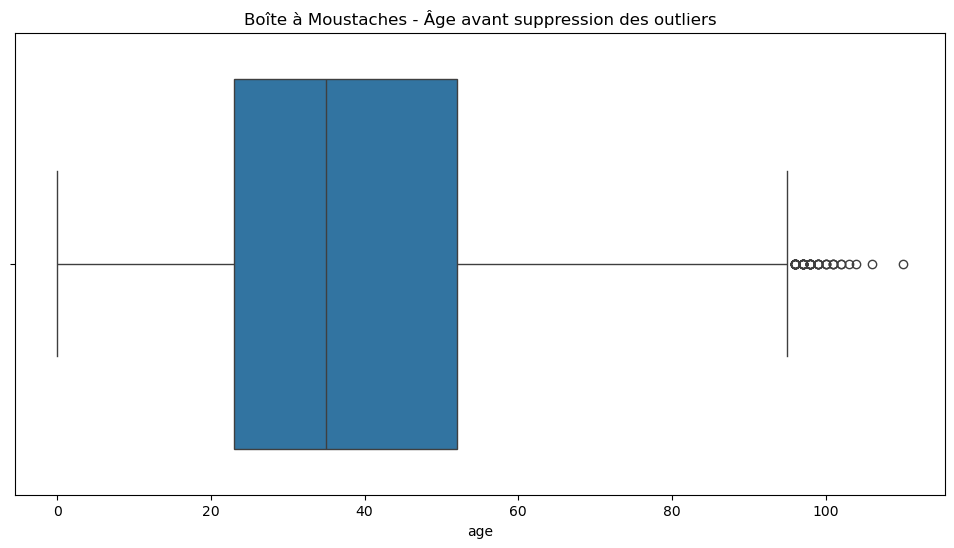

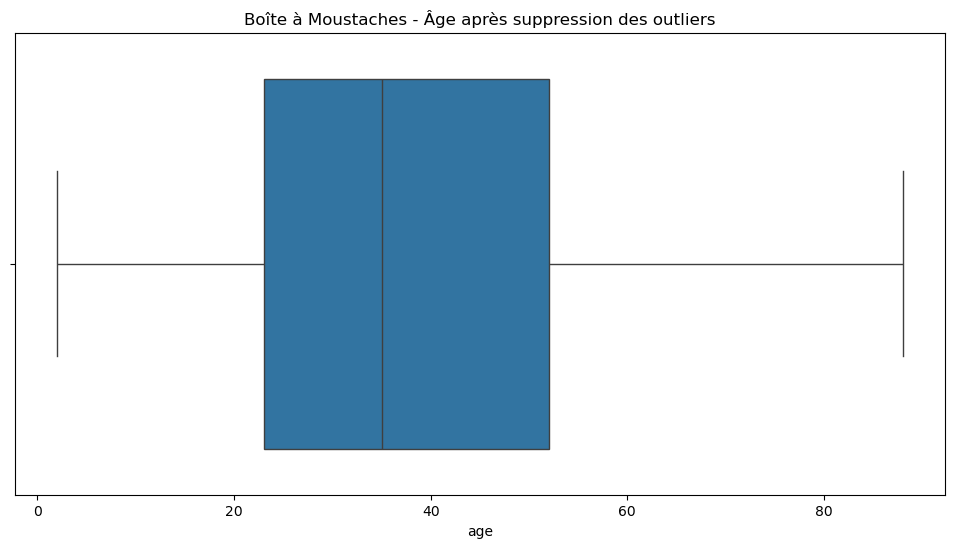

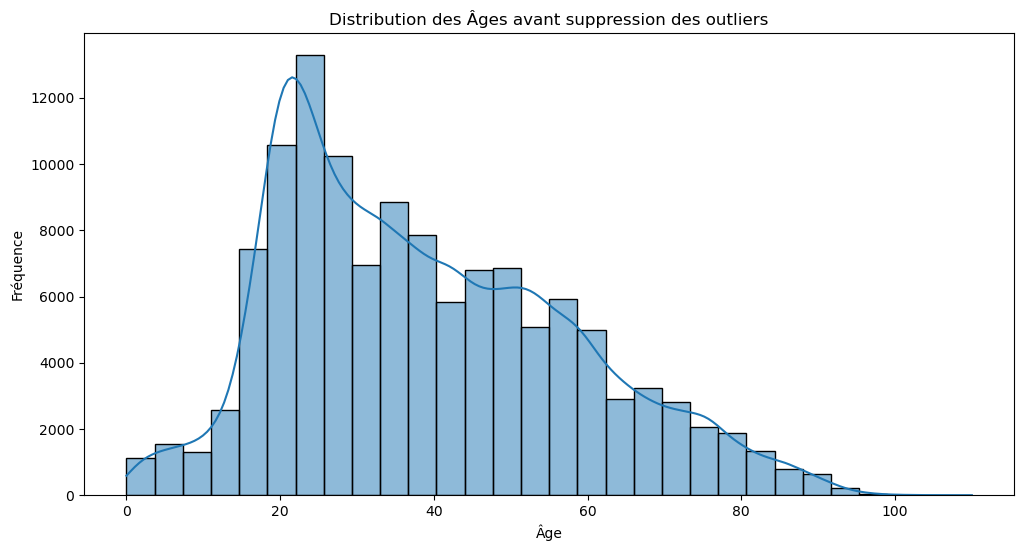

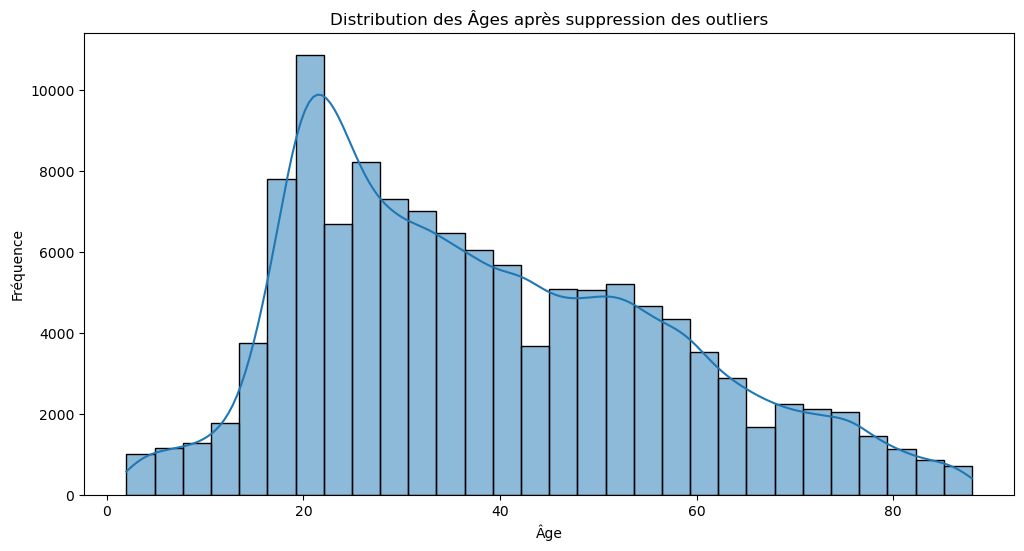

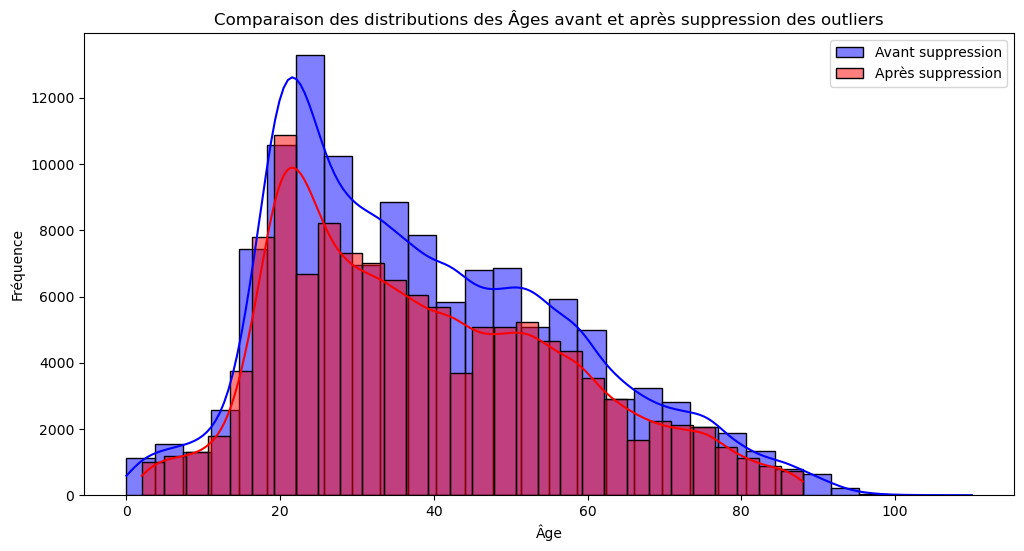

In [23]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# 1. Appliquer IsolationForest pour détecter les outliers dans la variable 'age'
model = IsolationForest(contamination=0.01)  # contamination = proportion d'outliers attendus
data['outlier'] = model.fit_predict(data[['age']])

# 2. 'outlier' va valoir 1 pour les données normales et -1 pour les outliers
# Supprimer les outliers
data_no_outliers_iforest = data[data['outlier'] == 1]

# 3. Afficher le nombre d'outliers supprimés
outliers_count = data.shape[0] - data_no_outliers_iforest.shape[0]
print(f"Nombre d'outliers supprimés avec IsolationForest : {outliers_count}")

# 4. Visualiser les données avec boîte à moustaches avant suppression des outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['age'])
plt.title("Boîte à Moustaches - Âge avant suppression des outliers")
plt.show()

# 5. Visualiser les données avec boîte à moustaches après suppression des outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_no_outliers_iforest['age'])
plt.title("Boîte à Moustaches - Âge après suppression des outliers")
plt.show()

# 6. Distribution (Histogramme) avant suppression des outliers
plt.figure(figsize=(12, 6))
sns.histplot(data['age'], kde=True, bins=30)
plt.title("Distribution des Âges avant suppression des outliers")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

# 7. Distribution (Histogramme) après suppression des outliers
plt.figure(figsize=(12, 6))
sns.histplot(data_no_outliers_iforest['age'], kde=True, bins=30)
plt.title("Distribution des Âges après suppression des outliers")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

# 8. Comparaison des distributions avant et après suppression des outliers
plt.figure(figsize=(12, 6))

# Avant suppression des outliers
sns.histplot(data['age'], kde=True, color='blue', label='Avant suppression', bins=30)

# Après suppression des outliers
sns.histplot(data_no_outliers_iforest['age'], kde=True, color='red', label='Après suppression', bins=30)

plt.title("Comparaison des distributions des Âges avant et après suppression des outliers")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

data = data.drop(columns=['outlier'])

Nous observons que l'élimination des outliers a tendance à exclure une tranche de personnes âgées entre 90 et 100 ans, ainsi qu'une proportion importante de nourrissons. Cependant, il est crucial de souligner que ces groupes, bien que considérés comme des valeurs aberrantes d'un point de vue statistique, jouent un rôle significatif dans notre analyse. En effet, la gravité des accidents pour les personnes âgées, par exemple, peut avoir des conséquences financières importantes, notamment en termes d'indemnisation par les compagnies d'assurance en cas de décès. De même, les nourrissons, bien que moins nombreux, représentent une population vulnérable dont le risque d'accident et les conséquences doivent être prises en compte dans l'analyse des données. L'objectif initial était d'identifier des valeurs extrêmes, telles que des âges de 150 ou 200 ans, qui pourraient biaiser l'analyse. Cependant, les âges extrêmes que nous avons observés sont réalistes et pertinents pour notre étude, nous avons donc choisi de les conserver afin d'assurer que l'analyse reste complète et représentative de toutes les tranches d'âge, sans exclure de manière arbitraire des groupes potentiellement importants.

## Vérification des valeurs erronées pour les variables latitude et longitude

La vérification des valeurs erronées pour les variables latitude et longitude est une étape essentielle dans le nettoyage des données géographiques. Ces variables doivent être comprises dans des plages spécifiques : la latitude doit être comprise entre -90 et 90, et la longitude entre -180 et 180. Des valeurs en dehors de ces plages sont des erreurs qui peuvent survenir lors de la saisie des données ou de la collecte d'informations géographiques incorrectes.

In [24]:
import pandas as pd

# Création d'une copie de la base de données
data_copy = data.copy()

# Conversion des colonnes en types numériques, en forçant les erreurs de conversion à NaN
data_copy['lat'] = pd.to_numeric(data_copy['lat'], errors='coerce')
data_copy['long'] = pd.to_numeric(data_copy['long'], errors='coerce')

# Vérification pour 'lat' : doit être entre -90 et 90
invalid_lat = data_copy[(data_copy['lat'] < -90) | (data_copy['lat'] > 90)]

# Vérification pour 'long' : doit être entre -180 et 180
invalid_long = data_copy[(data_copy['long'] < -180) | (data_copy['long'] > 180)]

# Création d'un tableau pour afficher les résultats
results = pd.DataFrame({
    'Variable': ['lat', 'long'],
    'Entrées erronées': [invalid_lat.shape[0], invalid_long.shape[0]],
    'Pourcentage erroné': [
        (invalid_lat.shape[0] / data.shape[0]) * 100, 
        (invalid_long.shape[0] / data.shape[0]) * 100
    ]
})

# Appliquer des couleurs conditionnelles pour mettre en évidence les erreurs
def highlight_error(val):
    color = 'red' if val > 0 else 'green'
    return f'background-color: {color}'

# Appliquer le style sur les colonnes spécifiques
styled_results = results.style.applymap(highlight_error, subset=['Entrées erronées'])

# Affichage du tableau coloré
styled_results



/tmp/ipykernel_5709/1994767014.py:32: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_results = results.style.applymap(highlight_error, subset=['Entrées erronées'])


,Variable,Entrées erronées,Pourcentage erroné
0,lat,0,0.000000
1,long,0,0.000000


## Vérification des valeurs erronées pour la variable mois

La vérification des valeurs erronées pour la variable mois est cruciale dans notre travail, car elle garantit la qualité et la fiabilité des données utilisées pour l'analyse. Des valeurs incorrectes, comme des mois supérieurs à 12 ou inférieurs à 1, peuvent résulter d'erreurs de saisie ou de défauts dans les systèmes de collecte des données. Ignorer ces erreurs pourrait fausser les résultats et conduire à des interprétations erronées, notamment en ce qui concerne l'impact des mois sur la gravité des accidents. En détectant et en corrigeant ces anomalies, nous assurons la validité des analyses et évitons des biais qui pourraient affecter les conclusions.

In [25]:
import pandas as pd

# Création d'une copie de la base de données
data_copy = data.copy()

# Conversion de la colonne 'mois' en type numérique, en forçant les erreurs de conversion à NaN
data_copy['mois'] = pd.to_numeric(data_copy['mois'], errors='coerce')

# Vérification pour 'mois' : doit être entre 1 et 12 (mois de l'année)
invalid_mois = data_copy[(data_copy['mois'] < 1) | (data_copy['mois'] > 12)]

# Création d'un tableau pour afficher les résultats
results = pd.DataFrame({
    'Variable': ['mois'],
    'Entrées erronées': [invalid_mois.shape[0]],
    'Pourcentage erroné': [(invalid_mois.shape[0] / data.shape[0]) * 100]
})

# Appliquer des couleurs conditionnelles pour mettre en évidence les erreurs
def highlight_error(val):
    color = 'red' if val > 0 else 'green'
    return f'background-color: {color}'

# Appliquer le style sur les colonnes spécifiques avec .map (pour éviter l'avertissement)
styled_results = results.style.applymap(highlight_error, subset=['Entrées erronées'])

# Affichage du tableau coloré
styled_results



/tmp/ipykernel_5709/555800433.py:25: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_results = results.style.applymap(highlight_error, subset=['Entrées erronées'])


,Variable,Entrées erronées,Pourcentage erroné
0,mois,0,0.000000


## Catégorisation de la variable âge à l'aide de la méthode K-means pour une meilleure analyse

Bien que d'autres variables, telles que le sexe ou la catégorie socio-professionnelle, pourraient affiner cette catégorisation de l'âge, nous avons choisi de n'utiliser que la variable âge dans cette première analyse. Cette approche est d'autant plus pertinente dans notre cas, où l'objectif est de mesurer les différences de gravité des accidents en fonction des tranches d'âge, sans l'influence de facteurs supplémentaires. En effet, en utilisant uniquement l'âge, nous obtenons une segmentation claire qui nous permet de mieux observer l'effet de l'âge sur la gravité des accidents, sans la complexité ajoutée par d'autres variables. Bien que des différences de gravité puissent exister entre un homme de 50 ans et une femme de 50 ans, notre but est ici d'explorer l'impact de l'âge en soi, dans une approche descriptive. Cela nous permettra de comprendre de manière plus directe et précise comment les différentes tranches d'âge influencent la gravité des accidents, sans introduire des biais potentiels liés à d'autres facteurs.

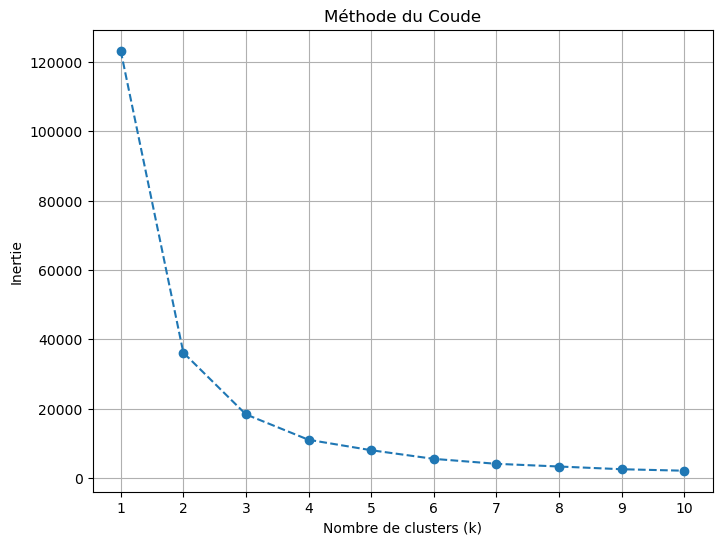

In [26]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Étape 2: Sélectionner la colonne 'age' pour appliquer le KMeans
age_data = data[["age"]]

# Étape 3: Normalisation de la variable 'age' (c'est souvent une bonne pratique pour KMeans)
scaler = StandardScaler()
age_data_scaled = scaler.fit_transform(age_data)

# Méthode du coude pour déterminer le nombre optimal de clusters
inertia = []  # Liste pour stocker les valeurs d'inertie

# Tester différentes valeurs de k (par exemple de 1 à 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(age_data_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Méthode du Coude')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


La courbe obtenue lors de l'application de la méthode du coude montre une diminution rapide de l'inertie pour k = 1, 2 et 3, mais à partir de k = 4, la diminution devient beaucoup moins marquée. Cela signifie qu'ajouter des clusters supplémentaires n'apporte plus une amélioration significative à la segmentation. Le point k = 4 représente donc un équilibre entre la complexité du modèle (nombre de clusters) et la qualité de la segmentation. Ce choix est appuyé par l'observation graphique, où la courbe commence à s'aplatir, indiquant que k = 4 est un choix optimal pour capturer les structures principales des données tout en évitant un sur-ajustement inutile.

In [27]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Exemple de chargement des données (assurez-vous que votre base "data" est déjà chargée)
# data = pd.read_csv("votre_fichier.csv")  # Remplacez par votre fichier réel

# On suppose que la variable 'age' est dans la base de données
age_data = data[['age']]

# Définir le nombre de clusters (à ajuster selon vos besoins)
n_clusters = 4

# Appliquer le K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(age_data)

# Ordonner les classes selon la moyenne des âges
cluster_order = (
    data.groupby('cluster')['age']
    .mean()
    .sort_values()
    .index
    .tolist()
)

# Mapper les clusters pour qu'ils soient ordonnés par âges croissants
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(cluster_order)}
data['age_class'] = data['cluster'].map(cluster_mapping)+1

# Supprimer l'ancienne colonne de cluster si non nécessaire
data = data.drop(columns=['cluster'])

# Calculer la distribution des observations par classe
distribution = data['age_class'].value_counts().sort_index()

# Afficher la distribution sous forme de tableau statistique

stat_summary = data.groupby('age_class')['age'].describe()

# Afficher le résumé statistique
print("Résumé statistique par classe :")
print(stat_summary)


Résumé statistique par classe :
             count       mean       std   min   25%   50%   75%    max
age_class                                                             
1          45618.0  19.994980  6.006547   0.0  17.0  21.0  24.0   28.0
2          35430.0  36.496190  4.875807  29.0  32.0  36.0  41.0   45.0
3          28238.0  54.148665  5.251658  46.0  50.0  54.0  58.0   64.0
4          13905.0  74.732902  7.322683  65.0  69.0  74.0  79.0  110.0


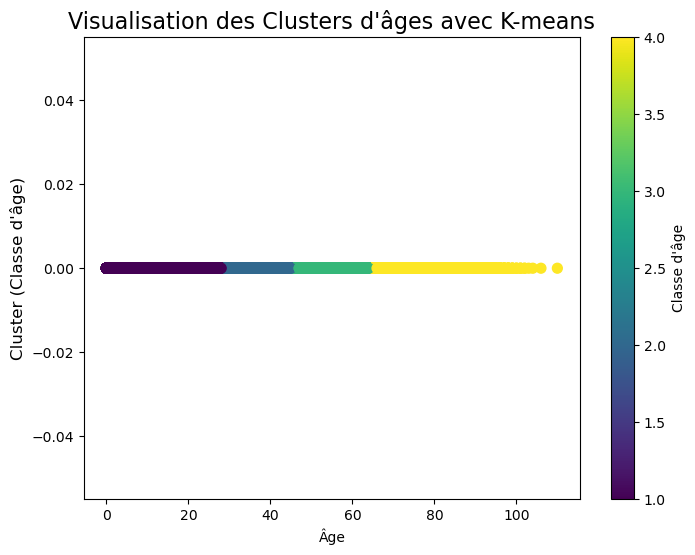

In [28]:
# Étape 5: Visualisation des clusters (avec classification multicolore)
plt.figure(figsize=(8, 6))

# Créer un scatter plot des âges en fonction des classes
scatter = plt.scatter(data['age'], np.zeros_like(data['age']), c=data['age_class'], cmap='viridis', s=50)

# Ajouter un titre et labels
plt.title('Visualisation des Clusters d\'âges avec K-means', fontsize=16)
plt.xlabel('Âge')
plt.ylabel('Cluster (Classe d\'âge)', fontsize=12)

# Ajouter une légende
plt.colorbar(scatter, label='Classe d\'âge')

# Afficher le graphique
plt.show()

## Analyse de la Pertinence de la Classification par Âge à Travers une Heatmap

Dans cette étape, nous cherchons à évaluer l'efficacité de la classification par âge en examinant la relation entre les classes d'âge et les classes de gravité des accidents. L'objectif est de vérifier si cette segmentation par âge permet de mieux comprendre et prédire les comportements ou les risques associés à différentes gravités d'accidents.

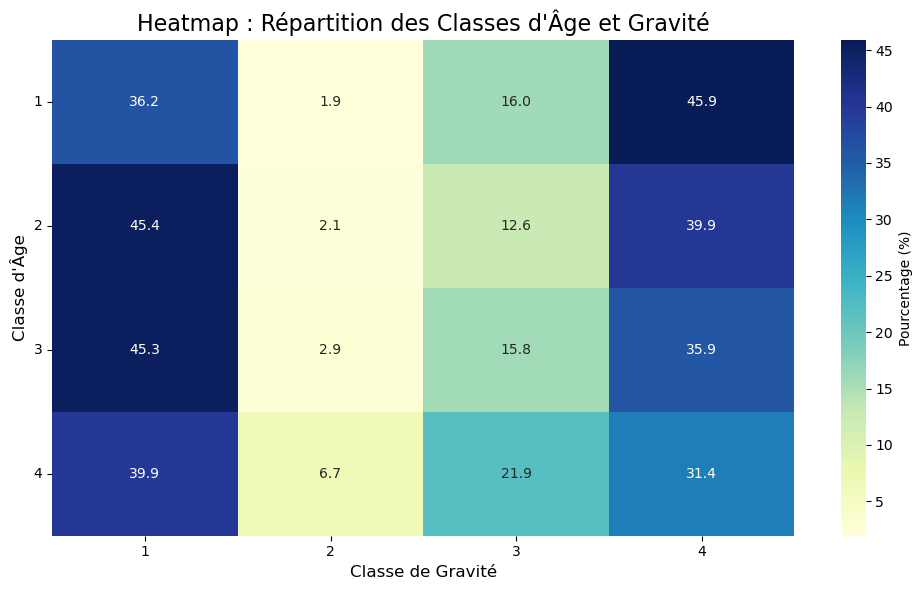

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Étape 1 : Créer un tableau croisé des classes d'âge et de gravité
# La variable 'grav_class' contient les classes de gravité (à ajuster si votre base utilise un autre nom)
contingency_table = pd.crosstab(data['age_class'], data['grav'], normalize='index') * 100

# Étape 2 : Visualiser la table croisée sous forme de heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    contingency_table, 
    annot=True,         # Affiche les pourcentages dans chaque case
    fmt=".1f",          # Formate les nombres en pourcentages avec une décimale
    cmap="YlGnBu",      # Colormap pour les couleurs
    cbar_kws={'label': 'Pourcentage (%)'}  # Légende pour la barre de couleur
)

# Personnalisation du graphique
plt.title('Heatmap : Répartition des Classes d\'Âge et Gravité', fontsize=16)
plt.xlabel('Classe de Gravité', fontsize=12)
plt.ylabel('Classe d\'Âge', fontsize=12)
plt.xticks(rotation=0)  # Garder les labels horizontaux
plt.yticks(rotation=0)
plt.tight_layout()  # Ajuster la mise en page pour éviter le chevauchement
plt.show()


La heatmap représente visuellement la répartition des pourcentages d’observations selon les combinaisons des classes d’âge (4 au total) et des classes de gravité (4 au total). Chaque case de la matrice indique le pourcentage correspondant à une combinaison spécifique de classe d’âge et de gravité, avec des couleurs graduées permettant d’identifier rapidement les concentrations les plus élevées. Plus la couleur est intense, plus le pourcentage d’observations est important pour cette combinaison. Si l’analyse de la heatmap révèle que certaines classes d’âge sont associées à des pourcentages élevés pour des classes spécifiques de gravité, cela souligne que la classification par âge est pertinente. En effet, cette segmentation permettrait de distinguer efficacement les comportements ou les risques en fonction des tranches d’âge, ce qui justifie son intégration dans l’analyse.

In [30]:
#Suppression de la variable age
del data['age']
data

,mois,lum,dep,atm,com,agg,lat,long,grav,place,sexe,secu1,secu2,secu3,catv,motor,age_class
0,5,1,75,2,75101,2,"48,86638600","2,32347100",4,1,1,2,0,-1,30,1,2
1,5,5,94,3,94080,2,"48,84547782","2,42868146",1,1,2,1,0,-1,7,1,1
2,5,5,94,3,94080,2,"48,84547782","2,42868146",3,10,1,0,-1,-1,7,1,1
3,5,1,94,2,94022,2,"48,76240000","2,40655000",3,1,1,2,6,0,2,1,2
4,5,1,94,2,94022,2,"48,76240000","2,40655000",1,1,2,1,0,0,7,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123186,10,1,973,1,97302,1,"4,89713000","-52,32854000",4,1,1,2,0,-1,30,1,3
123187,10,1,973,1,97302,1,"4,89713000","-52,32854000",1,1,2,1,0,-1,7,1,3
123188,10,1,69,6,69387,2,"45,73306000","4,82540000",1,2,2,1,-1,-1,7,1,1
123189,10,1,69,6,69387,2,"45,73306000","4,82540000",1,1,2,1,-1,-1,7,1,1


## **2. Analyse descriptive de la base de données**

In [31]:
print(data.columns)


Index(['mois', 'lum', 'dep', 'atm', 'com', 'agg', 'lat', 'long', 'grav',
       'place', 'sexe', 'secu1', 'secu2', 'secu3', 'catv', 'motor',
       'age_class'],
      dtype='object')
